Topic:        Challenge Set 3

Subject:      Pandas

Date:         01/21/2018

Name:         Will Stokvis

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/Users/williamstokvis/Education/metis/nyc18_ds14/challenges/challenges_data/2013_movies.csv')

In [4]:
df

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04 00:00:00
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21 00:00:00
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13 00:00:00
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,2013-05-24 00:00:00
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08 00:00:00


In [7]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

In [9]:
df['Rating'] = df['Rating'].astype('category')

In [10]:
df.dtypes

Title                         object
Budget                       float64
DomesticTotalGross             int64
Director                      object
Rating                      category
Runtime                        int64
ReleaseDate           datetime64[ns]
dtype: object

### Challenge 1

Plot domestic total gross over time.

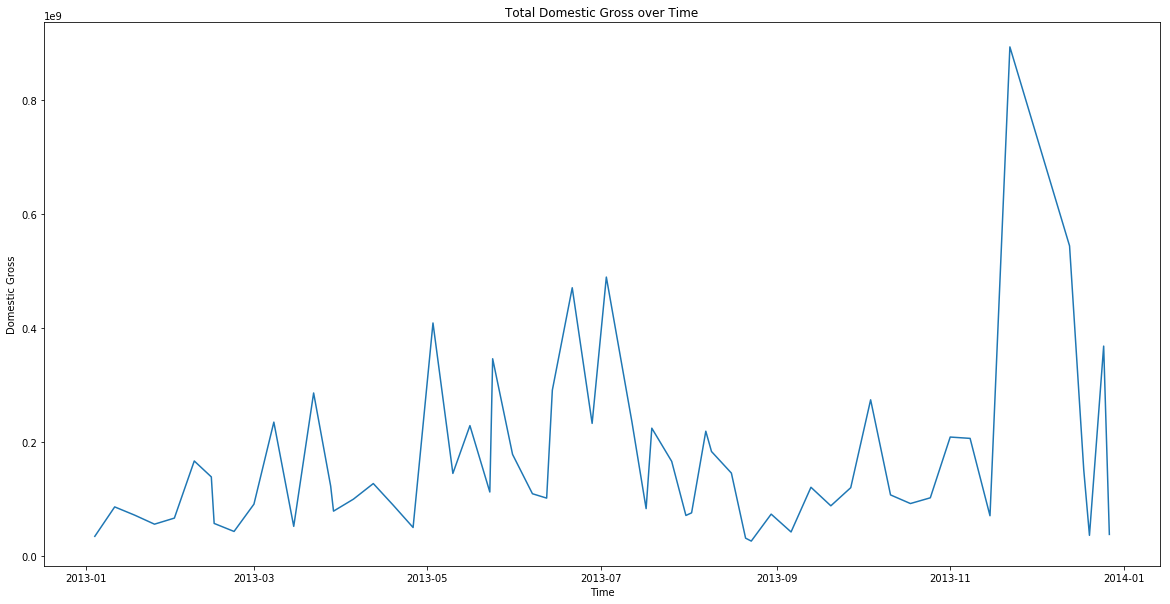

In [164]:
grouped_domestic_gross = df.groupby(by = 'ReleaseDate')['DomesticTotalGross'].sum()
plt.figure(figsize = (20,10))
plt.xlabel('Time')
plt.ylabel('Domestic Gross')
plt.title('Total Domestic Gross over Time')
plt.plot(grouped_domestic_gross);

### Challenge 2

Plot runtime vs. domestic total gross.

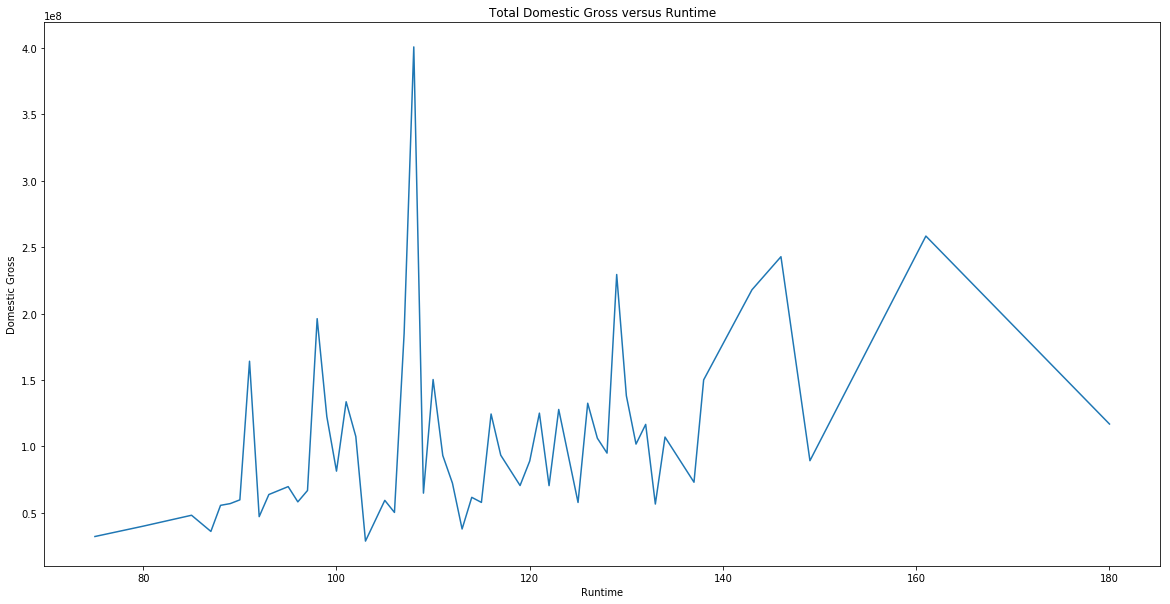

In [162]:
run_vs_gross = df.groupby(by = 'Runtime')['DomesticTotalGross'].mean()
plt.figure(figsize = (20,10))
plt.xlabel('Runtime')
plt.ylabel('Domestic Gross')
plt.title('Total Domestic Gross versus Runtime')
plt.plot(run_vs_gross);

### Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.



In [54]:
run_vs_gross = df.groupby(by = 'Rating')['Runtime','DomesticTotalGross'].mean()
run_vs_gross

### Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

In [92]:
time_vs_gross = df.groupby(by = ['Rating','ReleaseDate'])\
    ['DomesticTotalGross'].sum().to_frame().reset_index()
time_vs_gross.head()

,Rating,ReleaseDate,DomesticTotalGross
0,G,2013-06-21,268492764
1,PG,2013-02-15,57012977
2,PG,2013-03-08,234911825
3,PG,2013-03-22,187168425
4,PG,2013-05-24,107518682


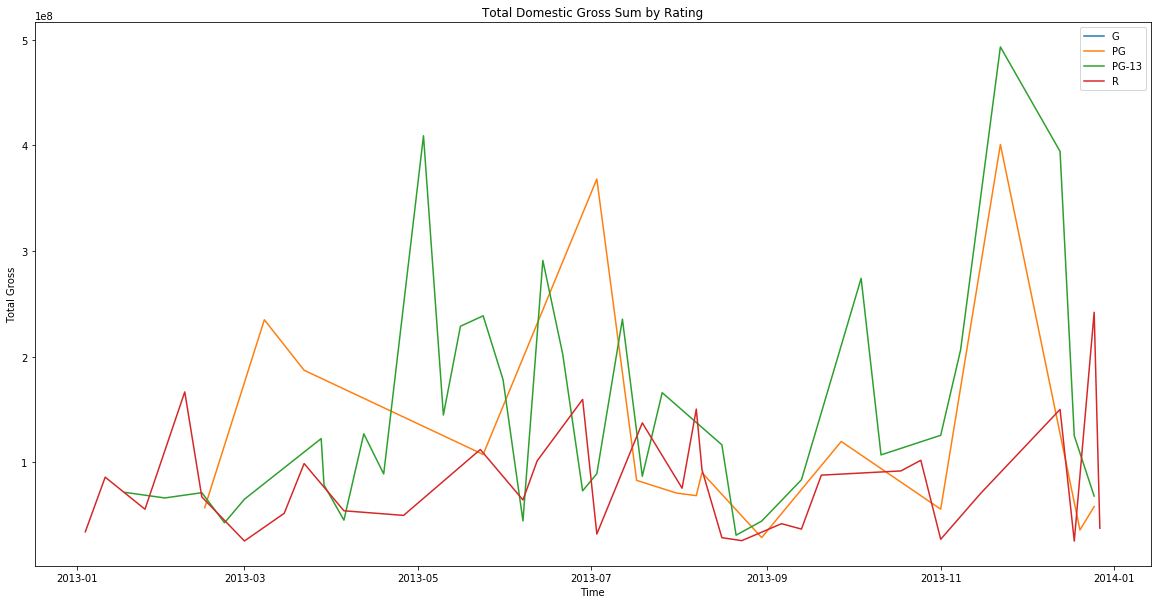

In [95]:
tvg_axes = ['G','PG','PG-13','R']
fig,ax = plt.subplots(figsize = (20,10))

for rating in tvg_axes:
    ax.plot(time_vs_gross[time_vs_gross['Rating'] == rating].ReleaseDate,\
            time_vs_gross[time_vs_gross['Rating'] == rating].DomesticTotalGross,\
            label=rating)

ax.set_xlabel("Time")
ax.set_ylabel("Total Gross")
ax.set_title('Total Domestic Gross Sum by Rating')
ax.legend(loc='best');



### Challenge 5

What director in your dataset has the highest gross per movie?

In [109]:
df_high_director = df.groupby('Director')['DomesticTotalGross'].sum().sort_values(ascending = False)
df_high_director.nlargest(1)

Director
Francis Lawrence    424668047
Name: DomesticTotalGross, dtype: int64

### Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

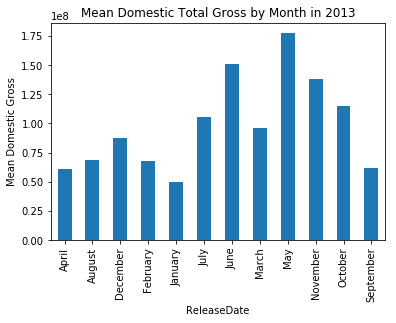

In [154]:
df_monthly = df.groupby(df['ReleaseDate'].dt.strftime('%B'))['DomesticTotalGross'].mean()
plt.title('Mean Domestic Total Gross by Month in 2013')
plt.ylabel('Mean Domestic Gross')
df_monthly.plot(kind = 'bar');